In [6]:
# Notebook 02: Cifrado de Imágenes con AES

### 📦 Celda 1: Librerías necesarias
#pip install pycryptodome pillow

from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io
import os

In [7]:
### 🔧 Celda 2: Funciones auxiliares

def pad(data):
    longitud = 16 - len(data) % 16
    return data + bytes([longitud]) * longitud

def unpad(data):
    return data[:-data[-1]]

def cargar_imagen_grises(ruta):
    imagen = Image.open(ruta).convert('L')  # Escala de grises
    return imagen, np.array(imagen)

def mostrar_imagen(array, titulo):
    plt.imshow(array, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

In [ ]:
### 🔐 Celda 3: Función para cifrado ECB (imagen)

def cifrar_ecb(imagen_array, clave):
    cifrador = AES.new(clave, AES.MODE_ECB)
    plano = imagen_array.flatten()
    plano_padded = pad(plano.tobytes())
    cifrado = cifrador.encrypt(plano_padded)
    cifrado_array = np.frombuffer(cifrado, dtype=np.uint8)[:plano.size]
    return cifrado_array.reshape(imagen_array.shape)

In [9]:
### 🔐 Celda 4: Función para cifrado CBC (imagen)
def cifrar_cbc(imagen_array, clave):
    iv = get_random_bytes(16)
    cifrador = AES.new(clave, AES.MODE_CBC, iv)
    plano = imagen_array.flatten()
    plano_padded = pad(plano.tobytes())
    cifrado = cifrador.encrypt(plano_padded)
    cifrado_array = np.frombuffer(cifrado, dtype=np.uint8)[:plano.size]
    return cifrado_array.reshape(imagen_array.shape)

In [10]:
### 🔤 Celda 5: Cifrado de texto simple para comparación

def cifrar_texto_ecb(mensaje, clave):
    cifrador = AES.new(clave, AES.MODE_ECB)
    datos = pad(mensaje.encode('utf-8'))
    cifrado = cifrador.encrypt(datos)
    return cifrado

mensaje1 = "ESTE ES UN MENSAJE SECRETO"
mensaje2 = "ESTE ES UN MENSAJE SEGRETO"  # cambia una letra

clave_texto = get_random_bytes(16)
cifrado1 = cifrar_texto_ecb(mensaje1, clave_texto)
cifrado2 = cifrar_texto_ecb(mensaje2, clave_texto)

print("Mensaje 1:", mensaje1)
print("Mensaje 2:", mensaje2)
print("\nCifrado 1:", cifrado1.hex())
print("Cifrado 2:", cifrado2.hex())

Mensaje 1: ESTE ES UN MENSAJE SECRETO
Mensaje 2: ESTE ES UN MENSAJE SEGRETO

Cifrado 1: 44ce1a68ccf8a9cd56bbe66ccedd550c0937674b36131ac60041abf25744a403
Cifrado 2: 44ce1a68ccf8a9cd56bbe66ccedd550cd93ee13a8e4436f380af75cc595007d3


In [11]:
### ✍️ Celda 5 bis: Cifrado de mensajes personalizados

# Escribe aquí tus propios mensajes
mensaje_a = "HOLA A TODOS"
mensaje_b = "HOLA B TODOS"

clave_personal = get_random_bytes(16)
cifrado_a = cifrar_texto_ecb(mensaje_a, clave_personal)
cifrado_b = cifrar_texto_ecb(mensaje_b, clave_personal)

print("\nMensaje A:", mensaje_a)
print("Mensaje B:", mensaje_b)
print("\nCifrado A:", cifrado_a.hex())
print("Cifrado B:", cifrado_b.hex())


Mensaje A: HOLA A TODOS
Mensaje B: HOLA B TODOS

Cifrado A: bb893a7c16ab898c5914447803a9e17c
Cifrado B: 707057ac9bad7a0fcaa27277292fd48e


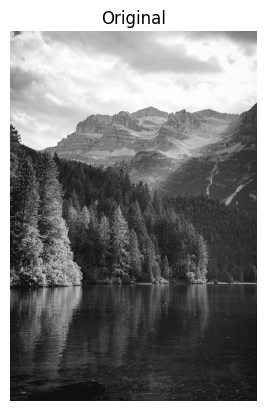

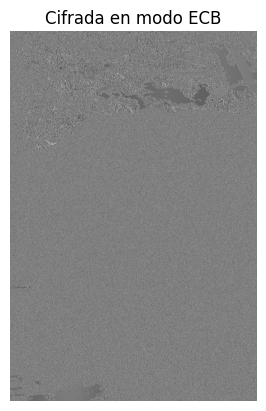

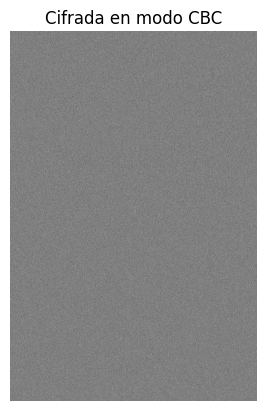

In [ ]:
### 🧪 Celda 6: Prueba con imagen

# Cambia esta ruta por la imagen que quieras probar
ruta = "paisaje.jpg"

clave = get_random_bytes(16)
original_img, matriz_original = cargar_imagen_grises(ruta)

cifrada_ecb = cifrar_ecb(matriz_original, clave)
cifrada_cbc = cifrar_cbc(matriz_original, clave)

mostrar_imagen(matriz_original, "Original")
mostrar_imagen(cifrada_ecb, "Cifrada en modo ECB")
mostrar_imagen(cifrada_cbc, "Cifrada en modo CBC")

### 📌 Nota:
# Puedes usar cualquier imagen PNG o JPG (convertida internamente a escala de grises)
# El cifrado ECB produce resultados visualmente inseguros aunque el texto parezca seguro.
# Esta sección ayuda a reflexionar sobre la diferencia entre apariencia de aleatoriedad y seguridad real.